# Overview and getting started



In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [9]:
data_dir = os.path.join(os.path.dirname(os.getcwd()), 'data/')

meta_path = os.path.join(data_dir, 'metadata/metadata.csv')
meter_dir = os.path.join(data_dir, 'meters/cleaned/')
weather_path = os.path.join(data_dir, 'weather/weather.csv')

for dirname, _, filenames in os.walk(meter_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/jiaqwu/Documents/Eureka/A_Projects/0000_Repository/building-data-genome-project-2/data/meters/cleaned/chilledwater_cleaned.csv
/Users/jiaqwu/Documents/Eureka/A_Projects/0000_Repository/building-data-genome-project-2/data/meters/cleaned/steam_cleaned.csv
/Users/jiaqwu/Documents/Eureka/A_Projects/0000_Repository/building-data-genome-project-2/data/meters/cleaned/hotwater_cleaned.csv
/Users/jiaqwu/Documents/Eureka/A_Projects/0000_Repository/building-data-genome-project-2/data/meters/cleaned/gas_cleaned.csv
/Users/jiaqwu/Documents/Eureka/A_Projects/0000_Repository/building-data-genome-project-2/data/meters/cleaned/irrigation_cleaned.csv
/Users/jiaqwu/Documents/Eureka/A_Projects/0000_Repository/building-data-genome-project-2/data/meters/cleaned/electricity_cleaned.csv
/Users/jiaqwu/Documents/Eureka/A_Projects/0000_Repository/building-data-genome-project-2/data/meters/cleaned/solar_cleaned.csv
/Users/jiaqwu/Documents/Eureka/A_Projects/0000_Repository/building-data-genome-project-2/dat

# Metadata

In [10]:
meta = pd.read_csv(meta_path)
print(meta.shape)
meta.head()

(1636, 32)


,building_id,site_id,building_id_kaggle,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,...,yearbuilt,date_opened,numberoffloors,occupants,energystarscore,eui,site_eui,source_eui,leed_level,rating
0,Panther_lodging_Dean,Panther,NaN,0.0,Lodging/residential,Residence Hall,508.8,5477.0,28.517689,-81.379039,...,1989.0,NaN,NaN,NaN,NaN,271,NaN,NaN,NaN,NaN
1,Panther_lodging_Shelia,Panther,NaN,0.0,Lodging/residential,Residence Hall,929.0,10000.0,28.517689,-81.379039,...,1992.0,NaN,NaN,NaN,NaN,62,NaN,NaN,NaN,NaN
2,Panther_lodging_Ricky,Panther,NaN,0.0,Lodging/residential,Residence Hall,483.1,5200.0,28.517689,-81.379039,...,2016.0,NaN,NaN,NaN,NaN,534,NaN,NaN,NaN,NaN
3,Panther_education_Rosalie,Panther,0.0,0.0,Education,Research,690.5,7432.0,28.517689,-81.379039,...,2008.0,NaN,NaN,NaN,NaN,276,NaN,NaN,NaN,NaN
4,Panther_education_Misty,Panther,1.0,0.0,Education,Research,252.7,2720.0,28.517689,-81.379039,...,2004.0,NaN,NaN,NaN,NaN,375,NaN,NaN,NaN,NaN


In [12]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   building_id            1636 non-null   object 
 1   site_id                1636 non-null   object 
 2   building_id_kaggle     1449 non-null   float64
 3   site_id_kaggle         1599 non-null   float64
 4   primaryspaceusage      1615 non-null   object 
 5   sub_primaryspaceusage  1615 non-null   object 
 6   sqm                    1636 non-null   float64
 7   sqft                   1636 non-null   float64
 8   lat                    1399 non-null   float64
 9   lng                    1399 non-null   float64
 10  timezone               1636 non-null   object 
 11  electricity            1578 non-null   object 
 12  hotwater               185 non-null    object 
 13  chilledwater           555 non-null    object 
 14  steam                  370 non-null    object 
 15  wate

In [13]:
meta.describe()

,building_id_kaggle,site_id_kaggle,sqm,sqft,lat,lng,yearbuilt,numberoffloors,occupants
count,1449.000000,1599.000000,1636.000000,1636.000000,1399.000000,1399.000000,817.000000,441.000000,230.000000
mean,724.000000,6.722326,8224.033068,88522.795232,39.996887,-73.779899,1968.236230,3.614512,263.217391
std,418.434583,4.943530,10050.121946,108178.666361,7.403876,36.795109,30.935801,3.250338,401.643279
min,0.000000,0.000000,26.300000,283.000000,28.517689,-122.260729,1900.000000,1.000000,0.000000
25%,362.000000,3.000000,1936.925000,20849.000000,33.424425,-97.743100,1949.000000,1.000000,15.000000
50%,724.000000,5.000000,5074.400000,54620.500000,38.903504,-77.005349,1971.000000,2.000000,100.000000
75%,1086.000000,12.000000,10360.675000,111521.000000,44.978782,-76.485292,1994.000000,5.000000,314.500000
max,1448.000000,15.000000,81290.100000,875000.000000,53.349800,6.260300,2017.000000,26.000000,2380.000000


## Filtering out entries with missing data

In [42]:
meta_filtered = meta[meta['eui'].notna()].dropna(axis=1)

In [82]:
meta_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 1398
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   building_id            299 non-null    object 
 1   site_id                299 non-null    object 
 2   site_id_kaggle         299 non-null    float64
 3   primaryspaceusage      299 non-null    object 
 4   sub_primaryspaceusage  299 non-null    object 
 5   sqm                    299 non-null    float64
 6   sqft                   299 non-null    float64
 7   lat                    299 non-null    float64
 8   lng                    299 non-null    float64
 9   timezone               299 non-null    object 
 10  eui                    296 non-null    float64
dtypes: float64(6), object(5)
memory usage: 28.0+ KB


In [83]:
# Function to clean numeric columns
def clean_numeric(x):
    if isinstance(x, str):
        x = x.strip()
        if x == '-' or x == '':
            return np.nan
        return float(x.replace(',', ''))
    return x


# Clean numeric columns
numeric_columns = ['sqft', 'lat', 'lng', 'eui']
for col in numeric_columns:
    meta_filtered[col] = meta_filtered[col].apply(clean_numeric)
    # Convert to numeric, setting errors to NaN
    meta_filtered[col] = pd.to_numeric(meta_filtered[col], errors='coerce')

# Check for and handle NaN values
print(meta_filtered[numeric_columns].isna().sum())

# Option 1: Drop rows with NaN values
meta_clean = meta_filtered.dropna(subset=numeric_columns)
meta_clean = meta_clean[meta_clean['eui'] != 0]

# Option 2: Impute NaN values (example using mean)
# df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

sqft    0
lat     0
lng     0
eui     3
dtype: int64


In [84]:
meta_clean.describe()

,site_id_kaggle,sqm,sqft,lat,lng,eui
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,7.006780,9391.671525,101091.176271,37.389939,-87.780195,196.143729
std,6.491225,10959.892422,117971.362197,8.219436,5.930163,274.894781
min,0.000000,26.300000,283.000000,28.517689,-93.255398,1.000000
25%,0.000000,2272.000000,24456.000000,28.517689,-93.255398,76.950000
50%,13.000000,6185.900000,66585.000000,44.978782,-93.255398,124.000000
75%,13.000000,11301.600000,121649.500000,44.978782,-81.379039,215.400000
max,13.000000,80038.200000,861524.000000,44.978782,-81.379039,2544.000000


In [85]:
meta_clean.head()

,building_id,site_id,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,timezone,eui
0,Panther_lodging_Dean,Panther,0.0,Lodging/residential,Residence Hall,508.8,5477.0,28.517689,-81.379039,US/Eastern,271.0
1,Panther_lodging_Shelia,Panther,0.0,Lodging/residential,Residence Hall,929.0,10000.0,28.517689,-81.379039,US/Eastern,62.0
2,Panther_lodging_Ricky,Panther,0.0,Lodging/residential,Residence Hall,483.1,5200.0,28.517689,-81.379039,US/Eastern,534.0
3,Panther_education_Rosalie,Panther,0.0,Education,Research,690.5,7432.0,28.517689,-81.379039,US/Eastern,276.0
4,Panther_education_Misty,Panther,0.0,Education,Research,252.7,2720.0,28.517689,-81.379039,US/Eastern,375.0


In [108]:
# Select features and target
from sklearn.model_selection import GridSearchCV
X = meta_clean[['primaryspaceusage', 'sub_primaryspaceusage',
                'sqft', 'lat', 'lng', 'timezone']]
y = meta_clean['eui']

# Split the data first to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define numeric and categorical columns
numeric_features = ['sqft', 'lat', 'lng']
categorical_features = ['primaryspaceusage',
                        'sub_primaryspaceusage', 'timezone']

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessor and Lasso
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Lasso(alpha=0.1, max_iter=100000, tol=1e-4))])

# Fit the pipeline
lasso_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = lasso_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Get feature names after preprocessing
onehot_encoder = lasso_pipeline.named_steps['preprocessor'].named_transformers_[
    'cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out(
    categorical_features).tolist()
feature_names = numeric_features + cat_feature_names

# Get coefficients
coefficients = lasso_pipeline.named_steps['regressor'].coef_

# Create DataFrame of features and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 10 most important features:")
print(coef_df.head(10))

# Grid search for best alpha

param_grid = {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso_pipeline, param_grid,
                           cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"\nBest alpha: {grid_search.best_params_['regressor__alpha']}")
print(f"Best MSE: {-grid_search.best_score_}")

# Use the best model
best_lasso = grid_search.best_estimator_
y_pred_best = best_lasso.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nBest Model - Mean Squared Error: {mse_best}")
print(f"Best Model - R-squared Score: {r2_best}")


Mean Squared Error: 149030.70354657984
R-squared Score: -0.07904050888392189

Top 10 most important features:
                                          Feature  Coefficient
37   sub_primaryspaceusage_Parking: Open Air Ramp   806.394820
34                    sub_primaryspaceusage_Other   501.353359
24               sub_primaryspaceusage_Greenhouse   314.866170
38                 sub_primaryspaceusage_Research   184.764052
22       sub_primaryspaceusage_College Laboratory   162.029916
35           sub_primaryspaceusage_Parking Garage  -145.484315
40         sub_primaryspaceusage_Residence Hall\t   -70.622023
39           sub_primaryspaceusage_Residence Hall    53.214826
45  sub_primaryspaceusage_Warehouse (Conditioned)   -46.095247
21        sub_primaryspaceusage_College Classroom   -45.997160

Best alpha: 100
Best MSE: 60071.03098749915

Best Model - Mean Squared Error: 138852.2994744685
Best Model - R-squared Score: -0.005344887456727454


In [105]:
# Extract input features and target variable
X = meta_clean[['primaryspaceusage', 'sub_primaryspaceusage',
                'sqft', 'lat', 'lng', 'timezone']]
y = meta_clean['eui']

# Define the preprocessing for numerical and categorical features
numerical_features = ['sqft', 'lat', 'lng']
categorical_features = ['primaryspaceusage',
                        'sub_primaryspaceusage', 'timezone']

# Create the column transformer with appropriate transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline that first transforms the data and then applies Lasso regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))  # You can adjust the alpha parameter
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 144635.31835423803


In [106]:
from scipy.stats import f_oneway

# Extract input features and target variable
X = meta_clean[['primaryspaceusage', 'sub_primaryspaceusage',
                'sqft', 'lat', 'lng', 'timezone']]
y = meta_clean['eui']

# Calculate Pearson correlation for numerical features
numerical_features = ['sqft', 'lat', 'lng']
correlation_matrix = meta_clean[numerical_features + ['eui']].corr()
print("Pearson Correlation Coefficients:")
print(correlation_matrix['eui'])

# Calculate ANOVA for categorical features
categorical_features = ['primaryspaceusage',
                        'sub_primaryspaceusage', 'timezone']
anova_results = {}
for feature in categorical_features:
    groups = [y[X[feature] == category] for category in X[feature].unique()]
    anova_results[feature] = f_oneway(*groups).pvalue

print("\nANOVA p-values for Categorical Features:")
print(anova_results)

Pearson Correlation Coefficients:
sqft   -0.104024
lat    -0.023726
lng     0.023726
eui     1.000000
Name: eui, dtype: float64

ANOVA p-values for Categorical Features:
{'primaryspaceusage': 0.03377495800610119, 'sub_primaryspaceusage': 0.00017748715736140474, 'timezone': 0.6848671734847148}


In [107]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create the column transformer with appropriate transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline that first transforms the data and then applies Ridge regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # You can adjust the alpha parameter
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 139820.20937210033


## Examining the categorical varaibles

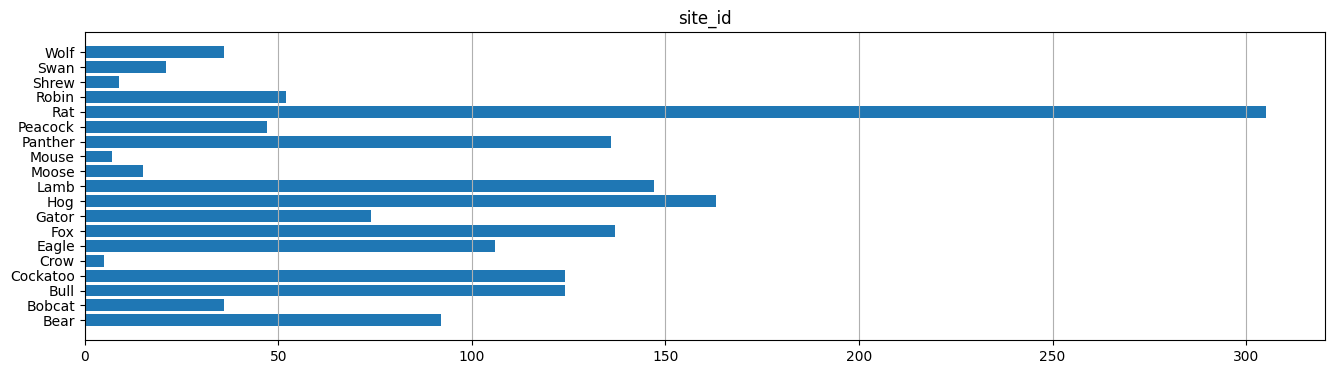

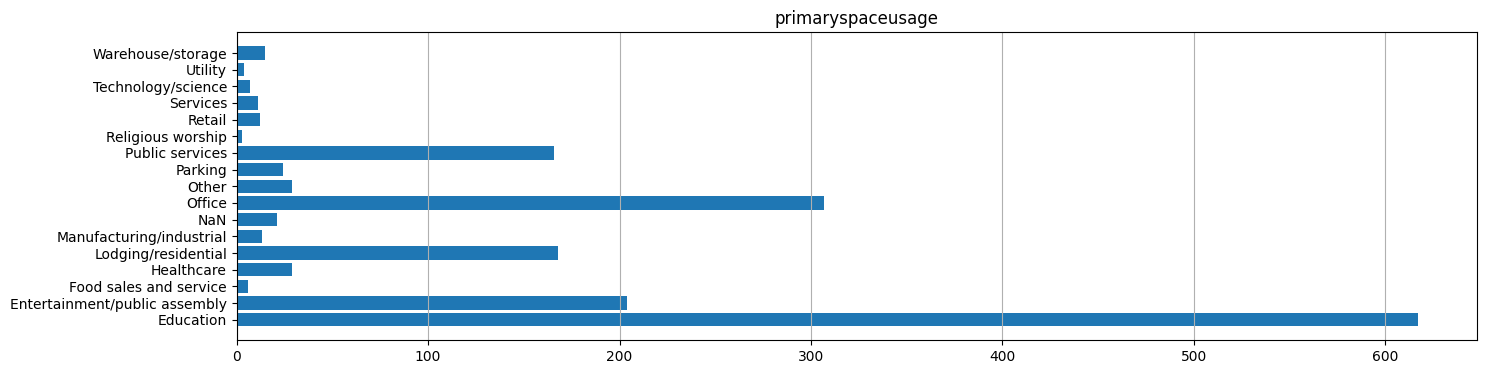

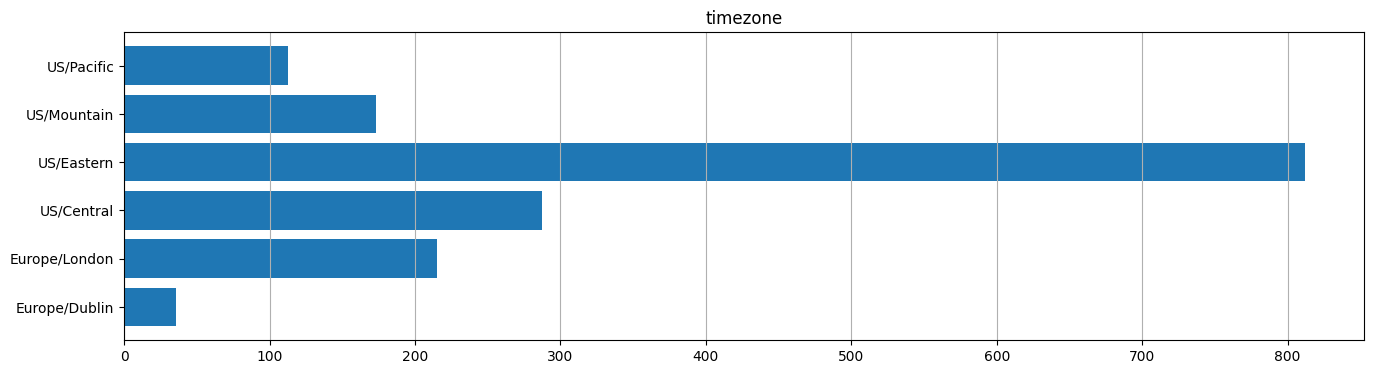

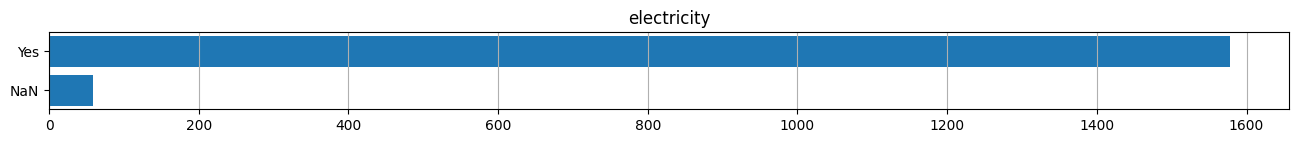

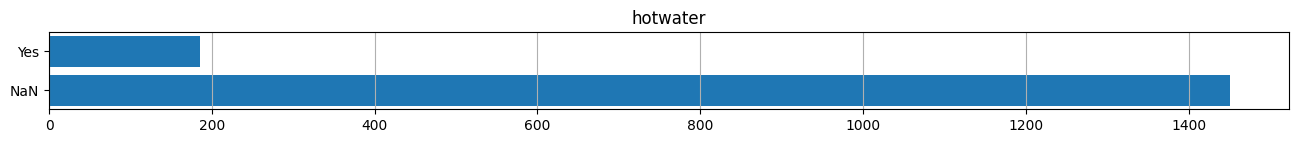

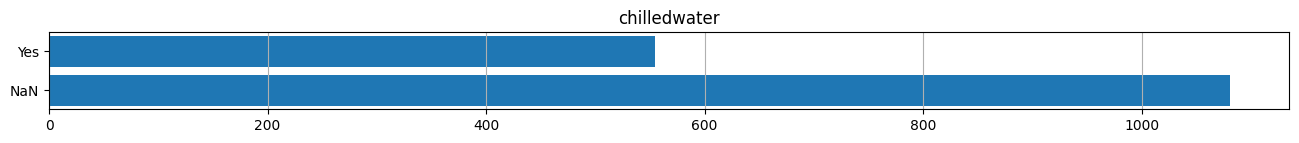

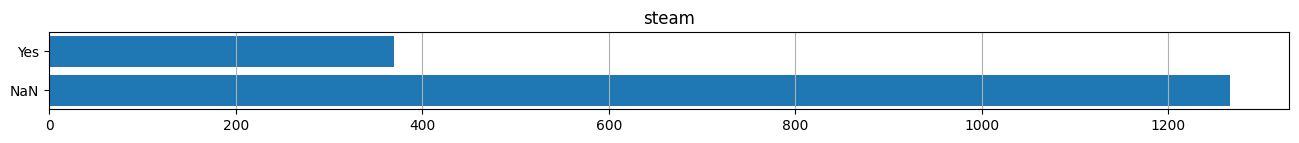

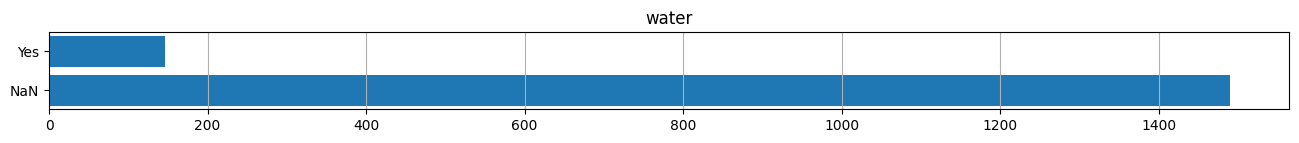

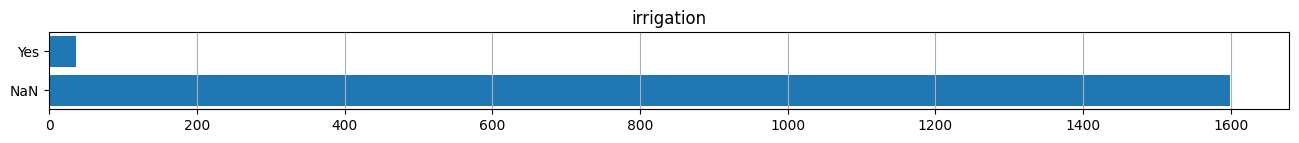

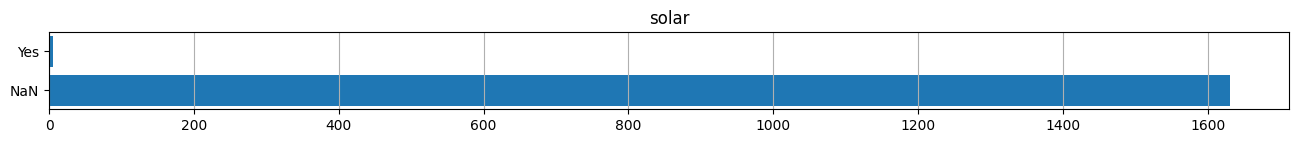

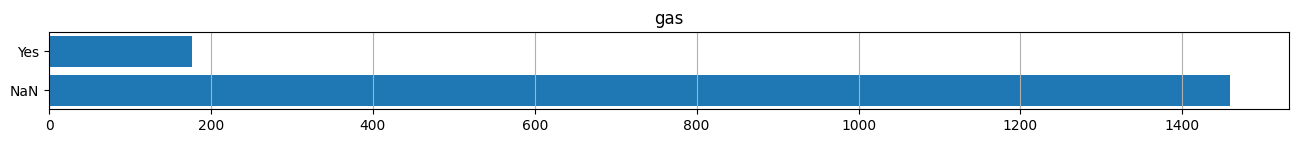

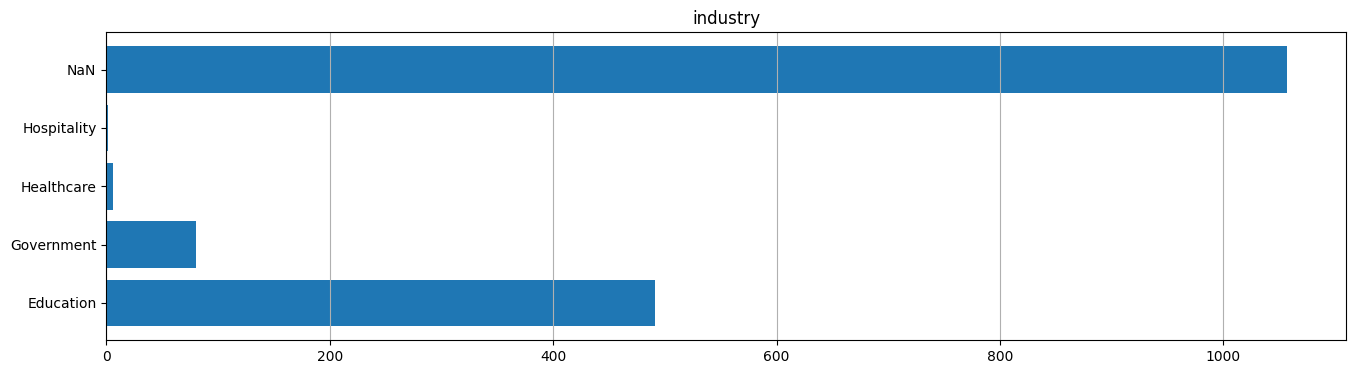

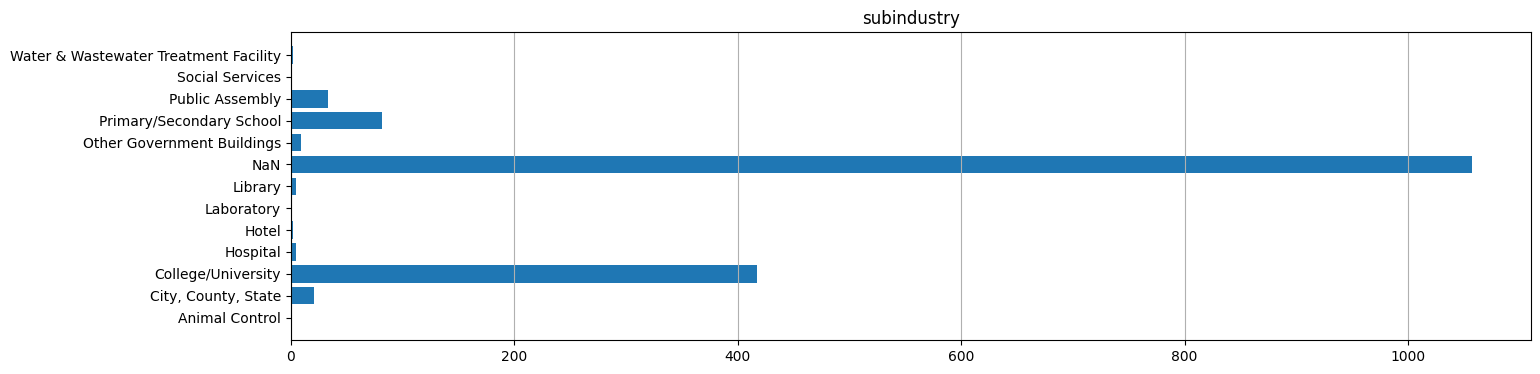

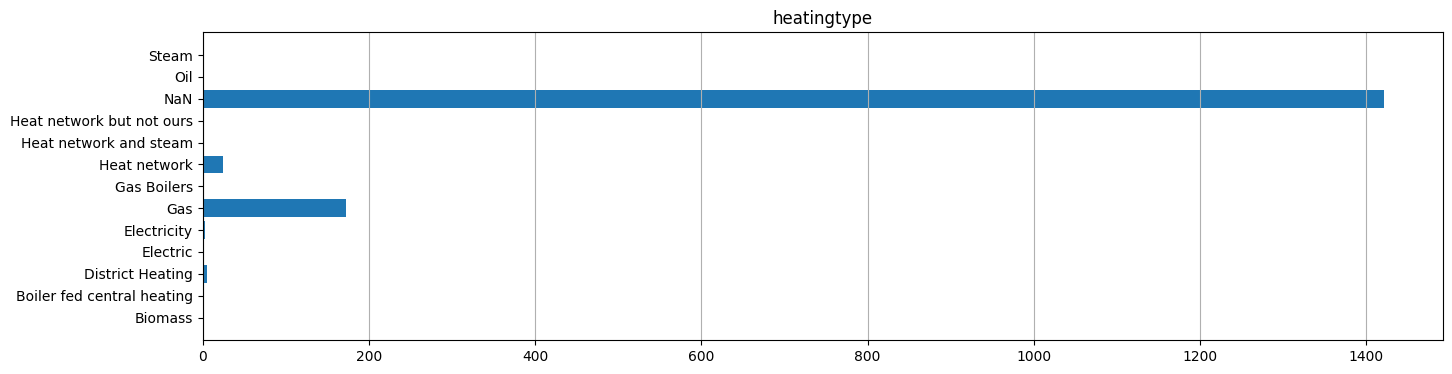

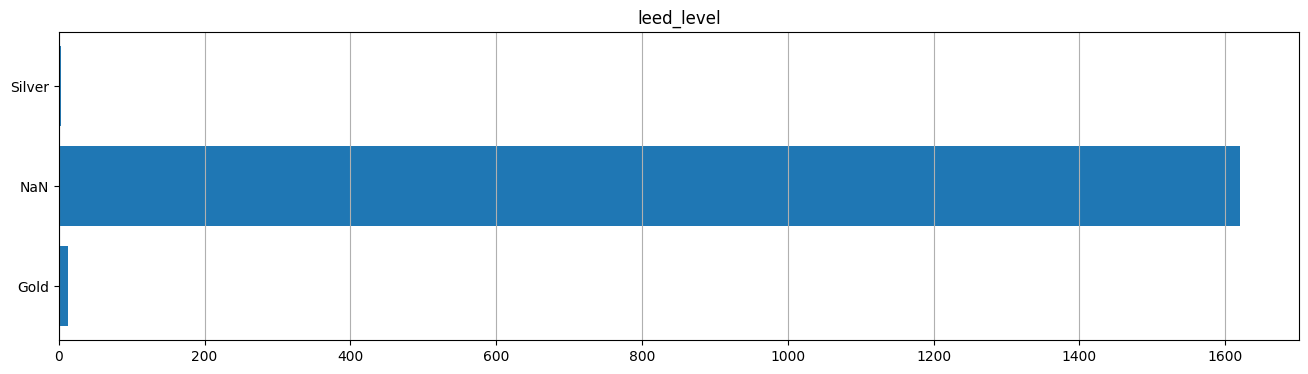

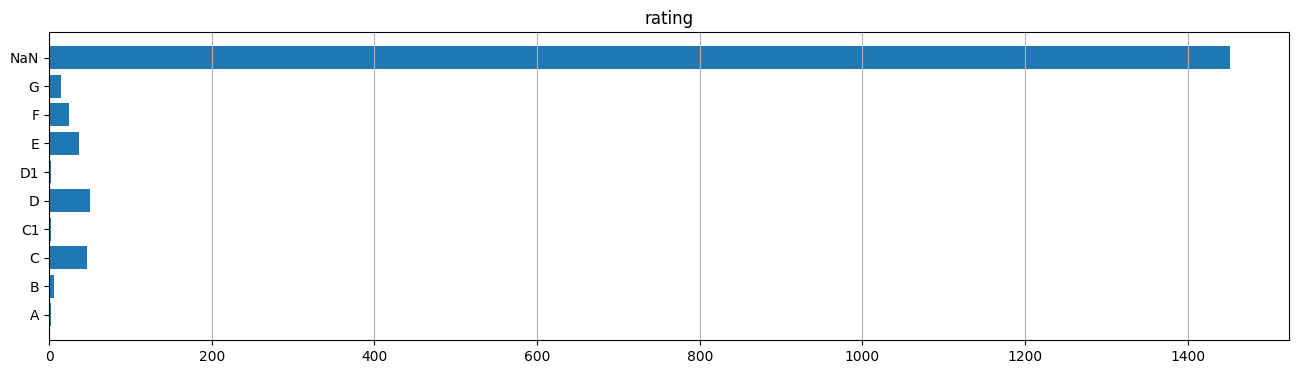

In [14]:
for col in meta.columns:
    if (meta[col].dtype == 'O'):
        data = meta[col].fillna('NaN')
        unique, counts = np.unique(data, return_counts=True)
        if (len(unique) < 20):
            size = [16, 4]
            if (len(unique) == 2):
                size = [16, 1]

            plt.figure(figsize=size)
            plt.title(col)
            plt.barh(unique, counts)
            plt.grid(axis='x')
            plt.show()

## Examining the Numerical Variables

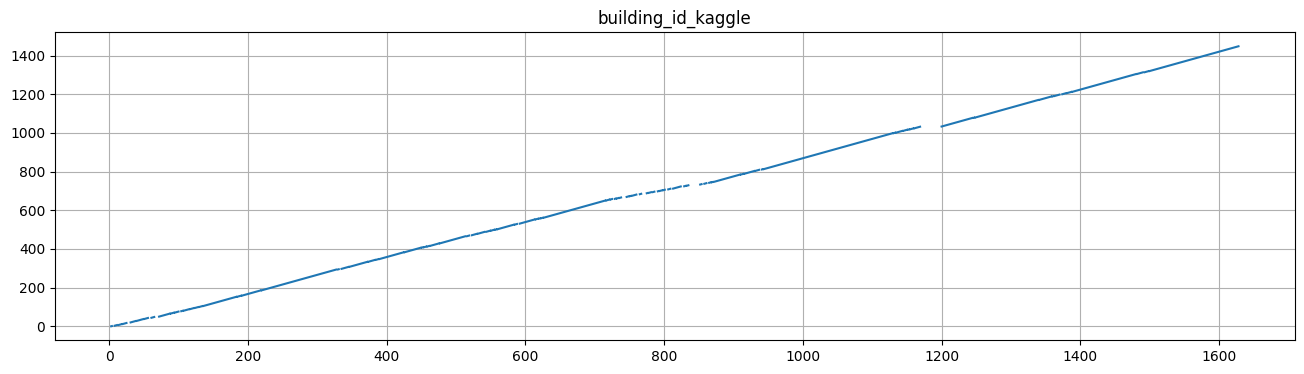

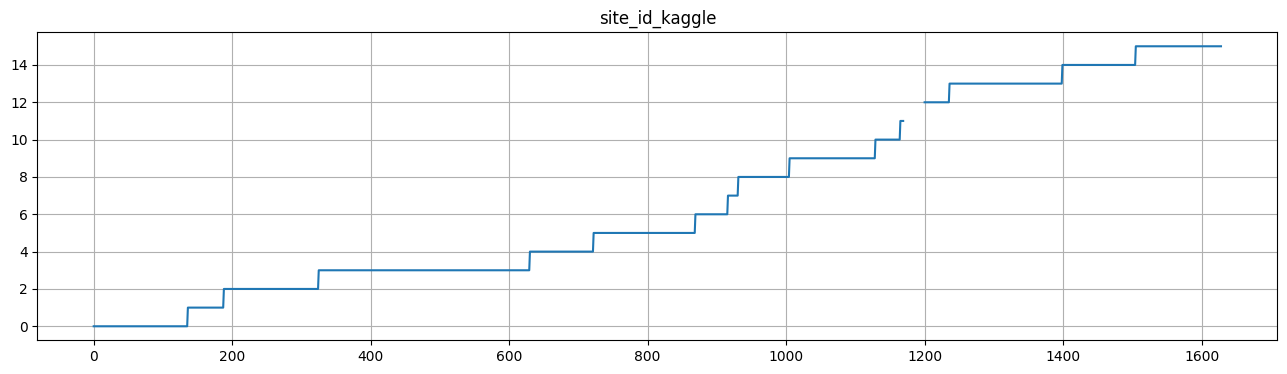

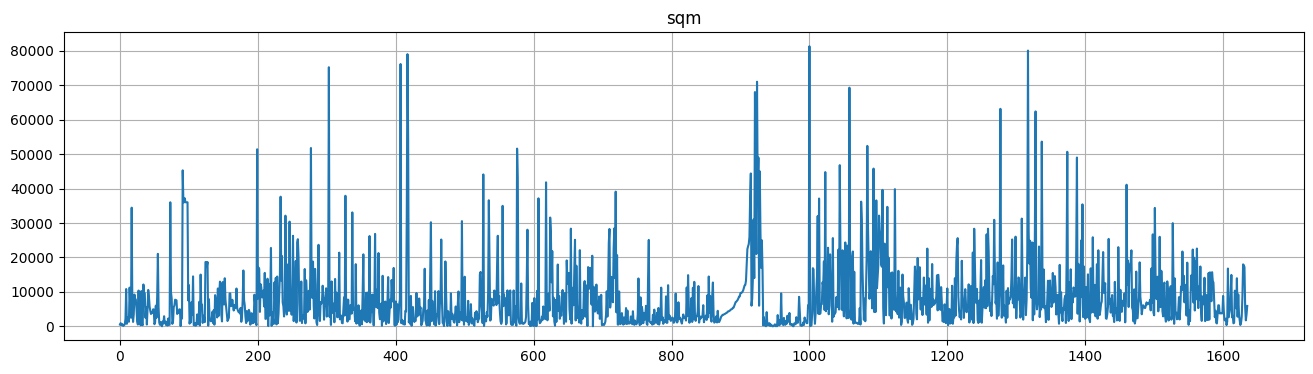

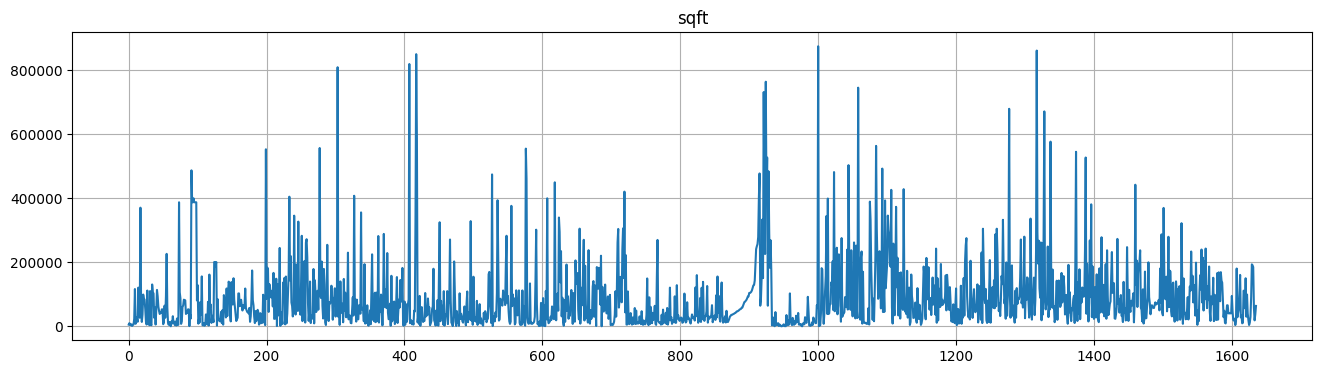

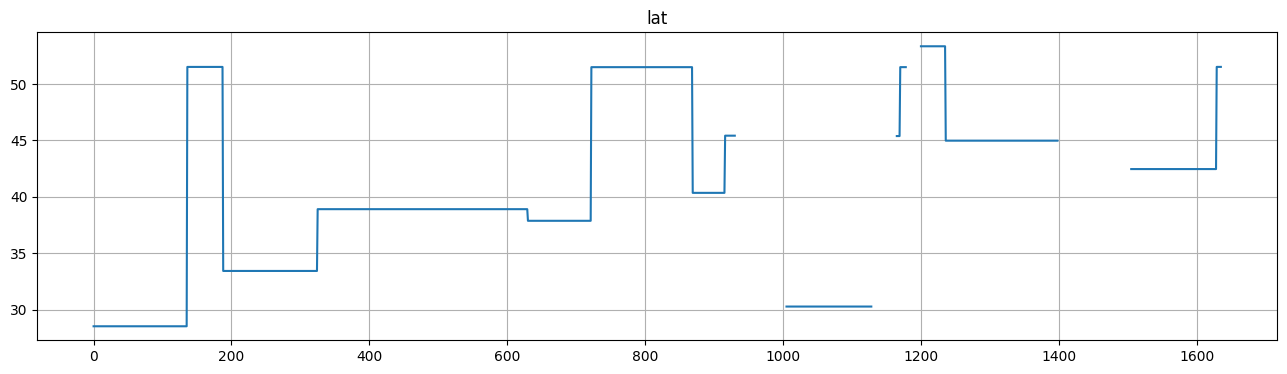

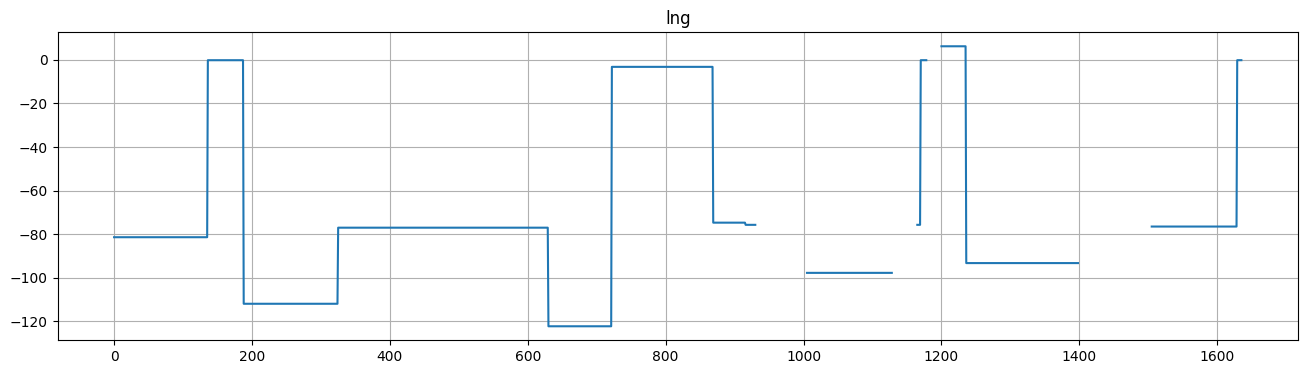

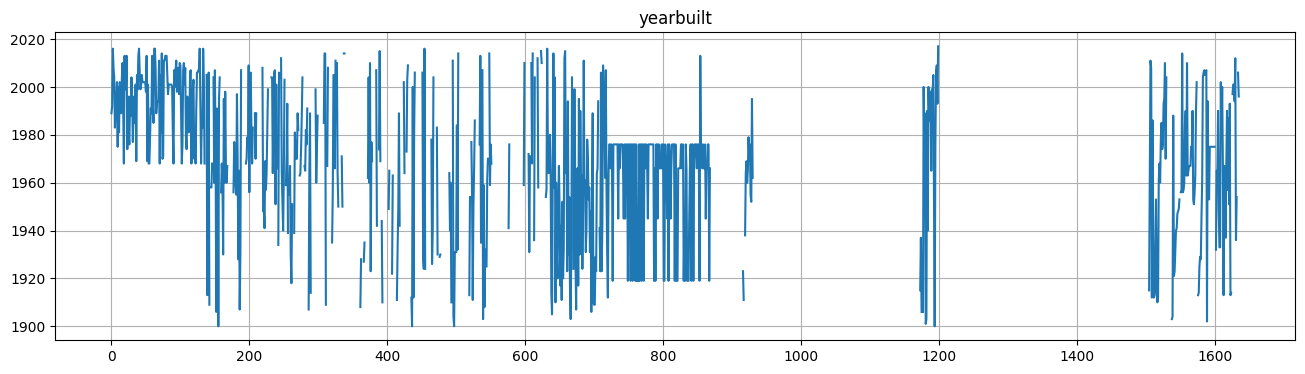

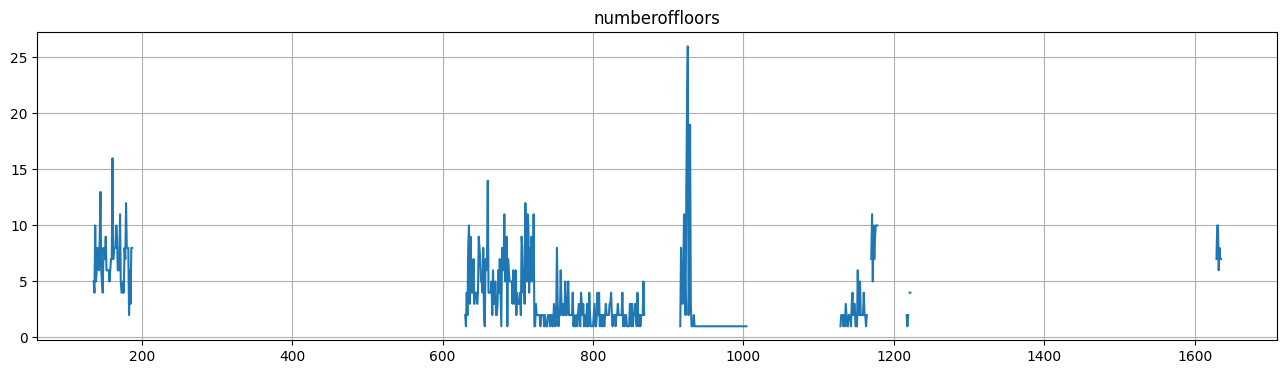

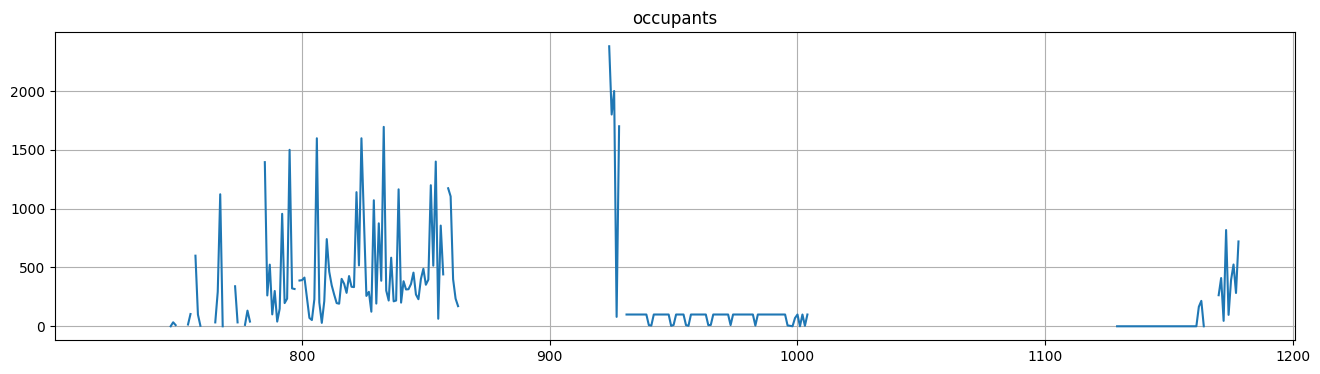

In [15]:
for col in meta.columns:
    data = meta[col]
    if (data.dtype == 'float64'):
        data = meta[col]
        plt.figure(figsize=[16, 4])
        plt.plot(data)
        plt.title(col)
        plt.grid()
        plt.show()

# Weather

In [16]:
weather = pd.read_csv(weather_path)
print(weather.shape)
weather.head()

(331166, 10)


,timestamp,site_id,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
0,2016-01-01 00:00:00,Panther,19.4,NaN,19.4,0.0,NaN,NaN,0.0,0.0
1,2016-01-01 01:00:00,Panther,21.1,6.0,21.1,-1.0,NaN,1019.4,0.0,0.0
2,2016-01-01 02:00:00,Panther,21.1,NaN,21.1,0.0,NaN,1018.8,210.0,1.5
3,2016-01-01 03:00:00,Panther,20.6,NaN,20.0,0.0,NaN,1018.1,0.0,0.0
4,2016-01-01 04:00:00,Panther,21.1,NaN,20.6,0.0,NaN,1019.0,290.0,1.5


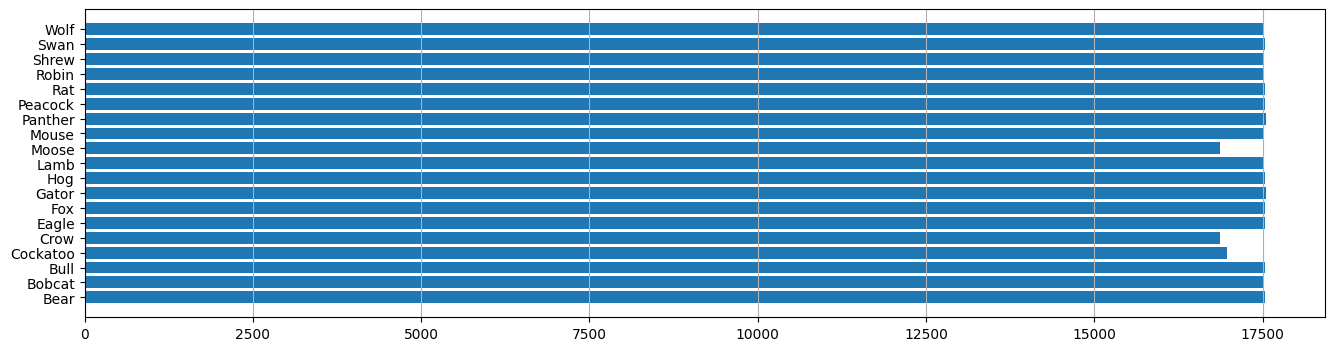

In [17]:
values, counts = np.unique(weather.site_id, return_counts=True)
plt.figure(figsize=[16, 4])
plt.barh(values, counts)
plt.grid(axis='x')
plt.show()

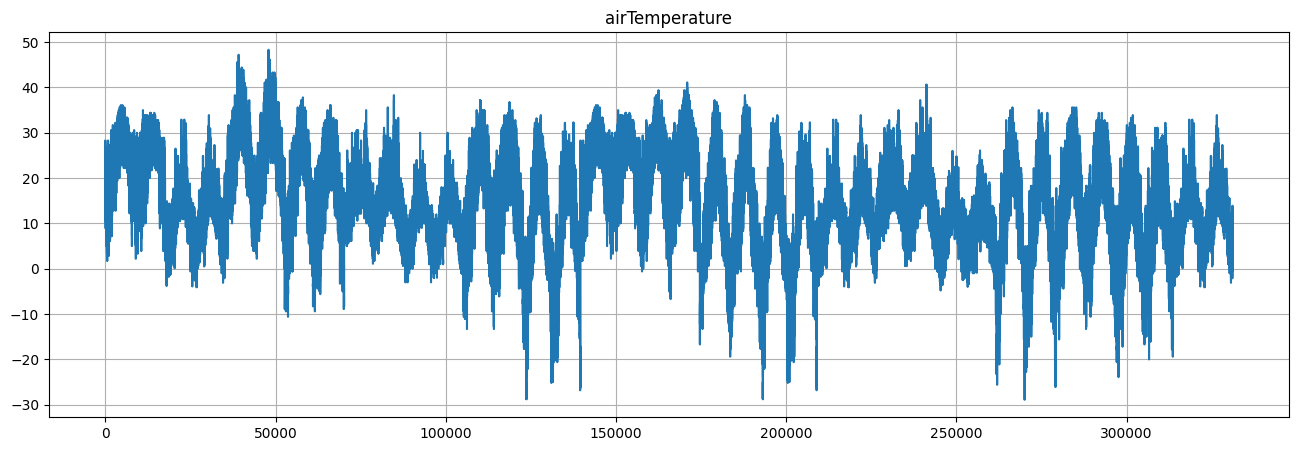

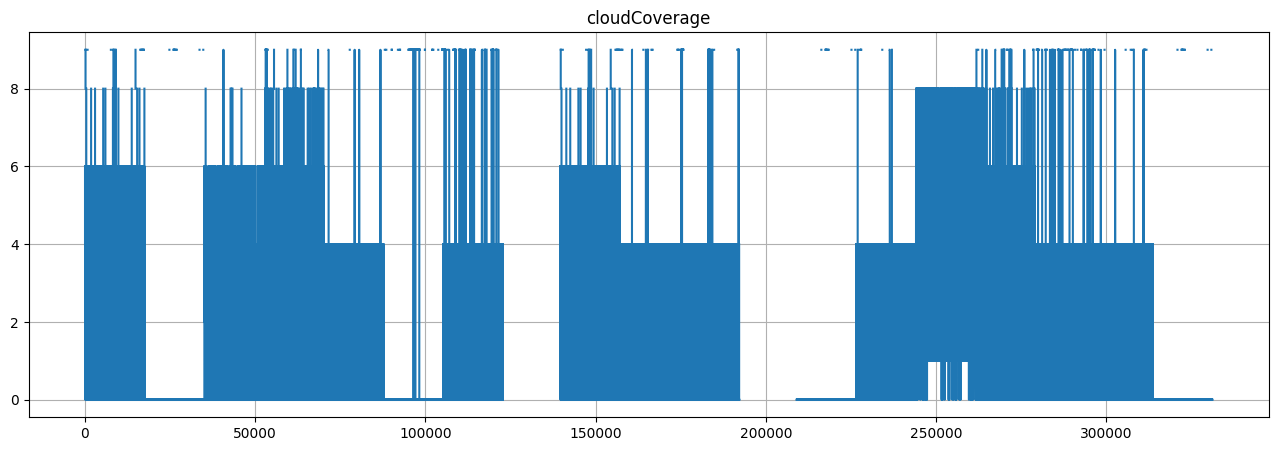

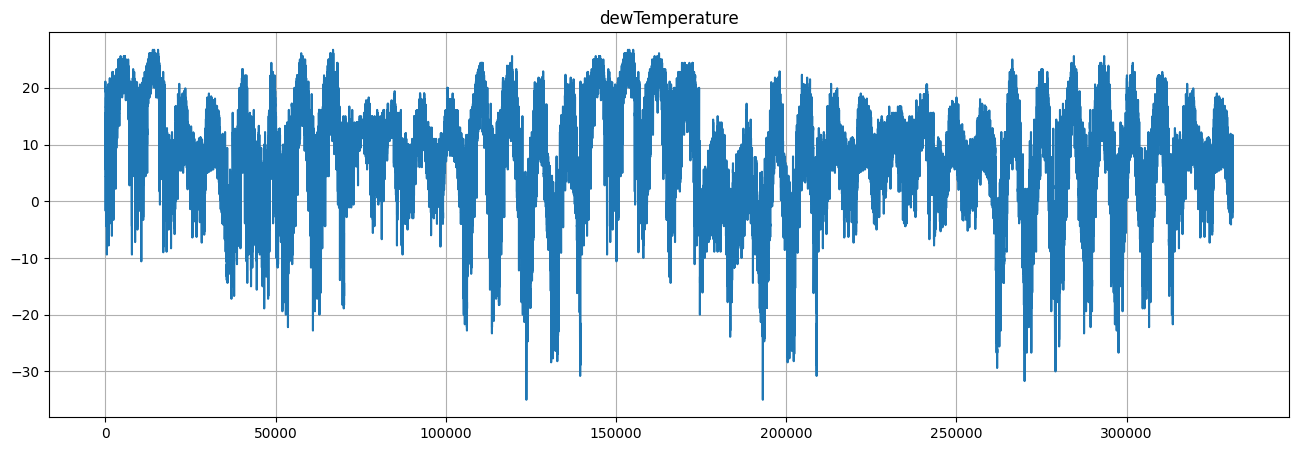

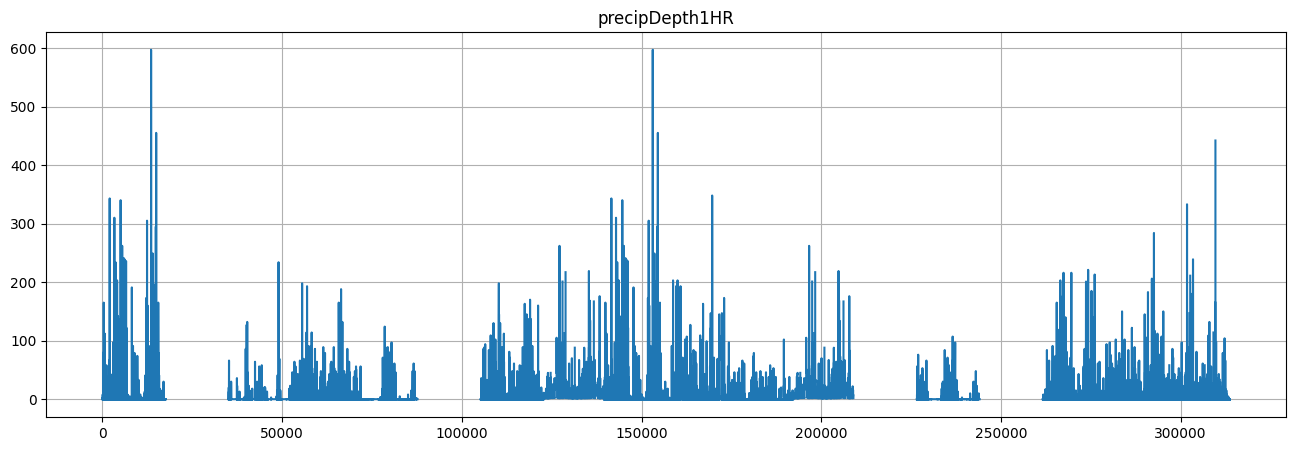

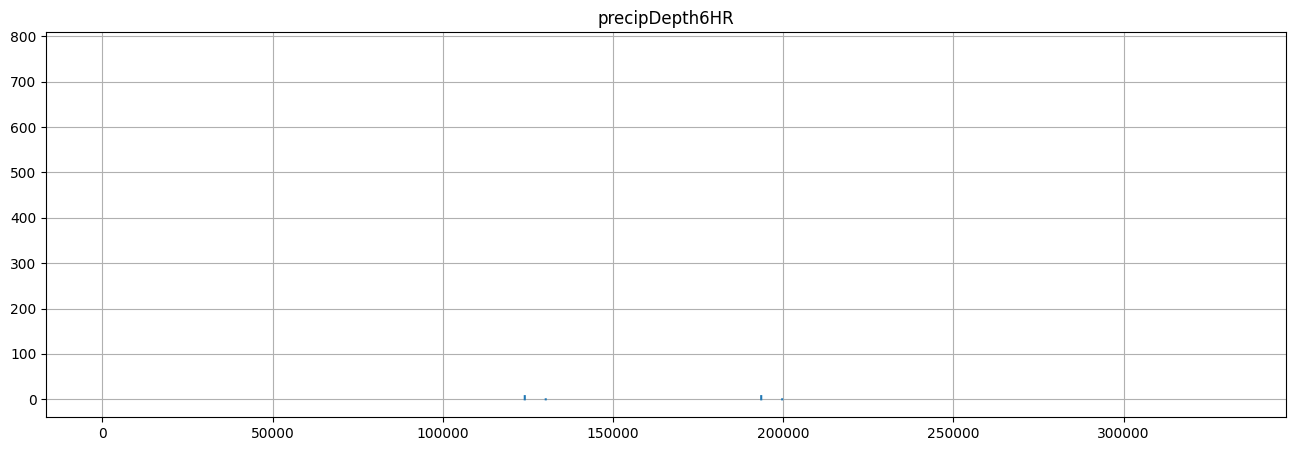

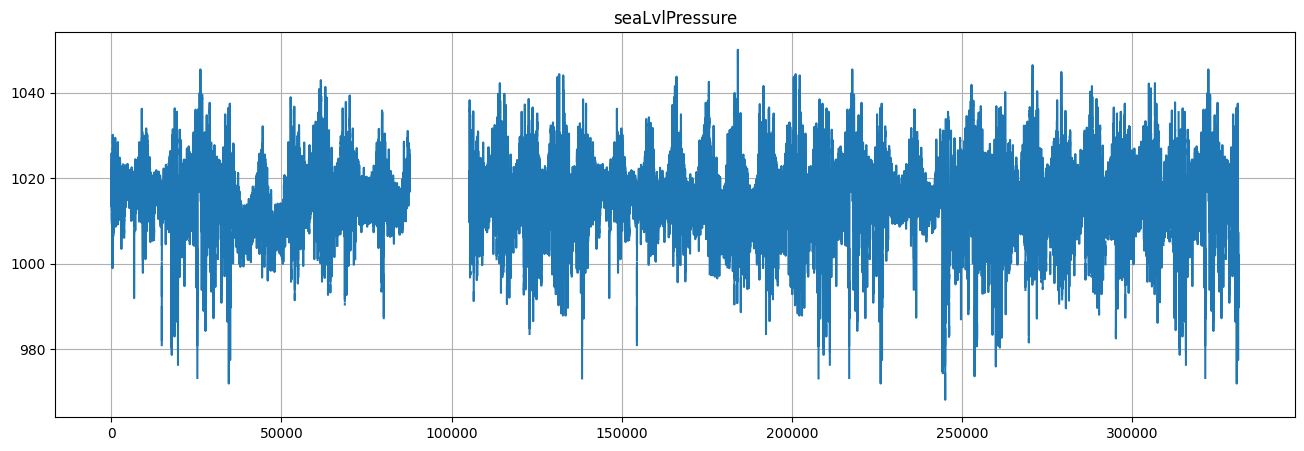

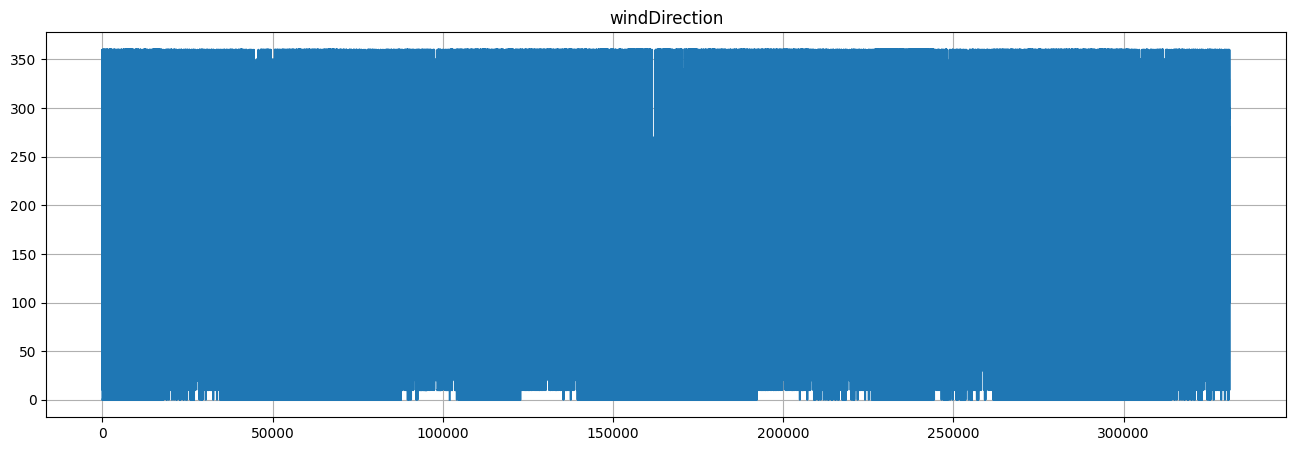

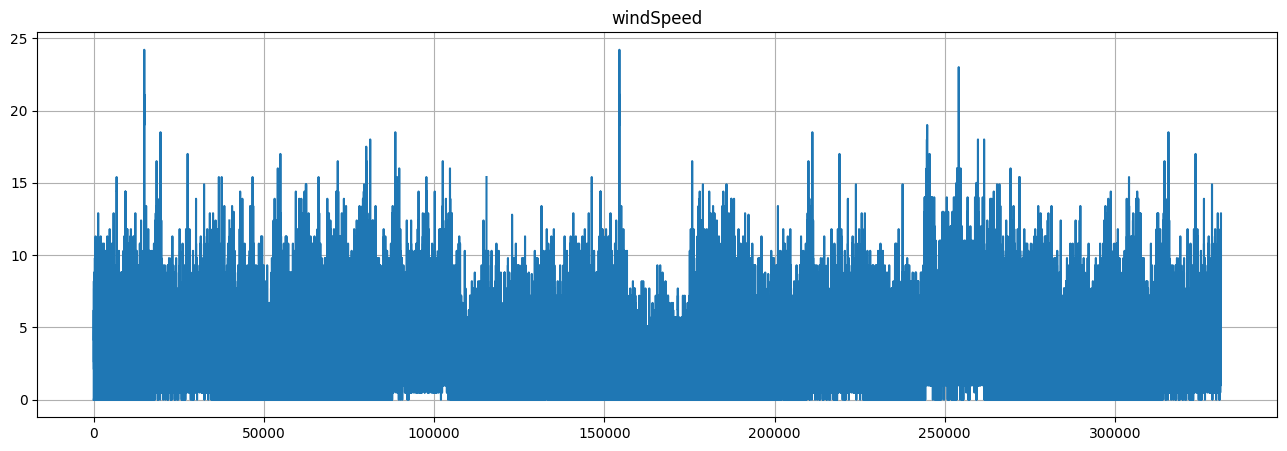

In [18]:
for col in weather.columns:
    if (col not in ['timestamp', 'site_id']):
        plt.figure(figsize=[16, 5])
        plt.title(col)
        plt.plot(weather[col])
        plt.grid()
        plt.show()

# Datasets

In [20]:
files = [f for f in os.listdir(meter_dir) if f not in [
    'metadata.csv', 'weather.csv']]
files

['chilledwater_cleaned.csv',
 'steam_cleaned.csv',
 'hotwater_cleaned.csv',
 'gas_cleaned.csv',
 'irrigation_cleaned.csv',
 'electricity_cleaned.csv',
 'solar_cleaned.csv',
 'water_cleaned.csv']

In [22]:
data = {}

for file in files:
    key = file.split('_')[0]
    data[key] = pd.read_csv(os.path.join(meter_dir, file))
    print("Key: {:15s} Shape: {}".format(key, data[key].shape))

Key: chilledwater    Shape: (17544, 556)
Key: steam           Shape: (17544, 371)
Key: hotwater        Shape: (17544, 186)
Key: gas             Shape: (17544, 178)
Key: irrigation      Shape: (17544, 38)
Key: electricity     Shape: (17544, 1579)
Key: solar           Shape: (17544, 6)
Key: water           Shape: (17544, 147)


In [23]:
data['chilledwater'].describe().T

,count,mean,std,min,25%,50%,75%,max
Panther_office_Clementine,5798.0,283.323307,127.168084,0.0000,197.930100,272.1539,358.748300,1014.3918
Panther_lodging_Cora,13995.0,771.365372,506.397842,0.0000,408.230800,668.0141,1014.391800,2399.9026
Panther_education_Teofila,15473.0,741.079689,579.507974,0.0000,123.706300,804.0910,1224.692500,2288.5669
Panther_education_Jerome,16023.0,2443.132831,1055.406466,0.0000,1657.664600,2535.9795,3389.553100,4453.4274
Panther_retail_Kristina,15945.0,84.474784,181.189337,0.0000,0.000000,0.0000,111.335700,1434.9933
...,...,...,...,...,...,...,...,...
Cockatoo_education_Minh,15550.0,8.698041,7.446465,1.5221,3.463800,4.5538,12.651325,32.9968
Cockatoo_education_June,15534.0,225.854058,293.813283,0.0000,32.070025,54.1804,349.585775,1157.6848
Cockatoo_education_Lionel,15529.0,134.458909,175.550069,0.0000,1.666300,23.3016,267.702300,592.4011
Cockatoo_public_Leah,15509.0,92.957983,109.015626,0.0000,11.129800,27.1388,167.555000,378.8175


In [24]:
data['electricity'].describe().T

,count,mean,std,min,25%,50%,75%,max
Panther_parking_Lorriane,14162.0,10.722723,2.760181,2.1004,8.58160,10.62200,12.90250,25.4972
Panther_lodging_Cora,14193.0,135.054565,21.643981,12.0023,119.37300,132.97570,149.27880,285.4512
Panther_office_Hannah,14154.0,6.683938,3.672796,1.1232,3.68470,5.96165,8.76445,27.7704
Panther_lodging_Hattie,14156.0,140.593488,29.975263,16.1631,120.98330,145.54810,161.47120,298.0532
Panther_education_Teofila,14156.0,156.466222,40.821717,4.6669,120.60055,153.93820,187.27985,375.0384
...,...,...,...,...,...,...,...,...
Mouse_lodging_Vicente,15888.0,45.767561,13.847546,10.0000,35.00000,40.92380,60.00000,100.0000
Mouse_health_Justin,15871.0,783.350343,176.618193,0.0017,647.71225,750.49100,887.63850,1487.0170
Mouse_health_Ileana,15723.0,43.587324,20.946759,6.0000,27.00000,35.00000,60.00000,126.0000
Mouse_health_Estela,15886.0,384.684218,95.102666,2.0000,309.00000,349.00000,465.00000,665.0000


In [25]:
data['gas'].describe().T

,count,mean,std,min,25%,50%,75%,max
Panther_lodging_Dean,17139.0,170.676505,145.519471,17.8688,89.3438,107.2126,214.4252,750.4883
Panther_lodging_Hattie,17487.0,1983.551570,1083.033709,0.0000,880.5523,1937.2153,2817.7675,6692.1979
Panther_education_Teofila,9790.0,11.134429,21.776425,0.0000,0.0000,0.0000,19.9306,119.5833
Panther_lodging_Amos,17267.0,55.571713,54.808776,0.0000,0.0000,99.6528,99.6528,199.3055
Panther_education_Jerome,17189.0,10256.690142,2999.826044,0.0000,7486.8429,10914.5534,12357.8005,25166.6169
...,...,...,...,...,...,...,...,...
Wolf_retail_Toshia,17193.0,329.096943,535.701979,0.0000,0.0000,0.0000,658.6306,2371.0702
Wolf_education_Katie,17192.0,1892.796767,3924.935923,0.0000,0.0000,0.0000,0.0000,15411.9560
Wolf_education_Joaquin,17541.0,2588.818897,1843.808492,0.0000,1053.8090,2502.7963,4083.5097,8035.2933
Wolf_education_Tori,17541.0,7408.533509,9179.556709,0.0000,0.0000,1844.1657,18573.3829,42942.7151


In [26]:
data['hotwater'].describe().T

,count,mean,std,min,25%,50%,75%,max
Robin_public_Carolina,17190.0,17.384627,25.651508,0.0,0.000000,6.77910,29.967450,1.150860e+02
Robin_office_Wai,8594.0,25.786280,80.832896,0.0,0.000000,0.00000,0.000000,4.995779e+02
Robin_office_Zelma,8607.0,44.123371,76.191701,0.0,0.000000,0.00000,100.000000,3.000000e+02
Robin_office_Lindsay,17192.0,7.462825,9.035235,0.0,0.000000,1.43590,12.422075,3.532880e+01
Robin_education_Derick,17523.0,400.944480,217.763263,0.0,225.508200,359.47750,570.302450,1.377867e+03
...,...,...,...,...,...,...,...,...
Eagle_education_Paul,17194.0,25325.546090,25983.838617,0.0,7085.050000,13785.26850,41042.607975,1.162912e+05
Eagle_assembly_Margret,17477.0,292735.887180,164894.179327,0.0,175732.727700,283860.07150,401351.268300,1.059046e+06
Eagle_office_Marisela,17194.0,58849.127621,143730.487281,0.0,0.000000,0.00000,0.000000,1.126488e+06
Cockatoo_education_Orlando,15717.0,18244.777391,16227.568202,0.0,5630.573900,11671.00930,28716.821400,6.919130e+04


In [27]:
data['irrigation'].describe().T

,count,mean,std,min,25%,50%,75%,max
Panther_lodging_Dianna,15014.0,664.899930,2463.499346,0.0,0.0000,0.0000,0.0000,16277.2630
Panther_lodging_Dean,16143.0,13.319165,69.747770,0.0,0.0000,0.0000,0.0000,378.5410
Panther_lodging_Cora,7408.0,756.136564,2671.320247,0.0,0.0000,1.1356,12.4919,14024.1870
Panther_parking_Lorriane,14527.0,514.710809,1863.322965,0.0,0.5678,40.9203,97.1715,10648.7372
Panther_parking_Asia,16835.0,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0000
Panther_lodging_Kara,10990.0,93.331276,341.672026,0.0,0.0000,0.0000,0.3785,1710.6268
Panther_lodging_Drew,17128.0,831.320503,2362.403188,0.0,0.0000,0.0000,0.0000,12491.8530
Panther_lodging_Ricky,17139.0,871.545430,2140.494349,0.0,0.0000,0.0000,0.0000,9084.9840
Panther_parking_Clarence,16262.0,6.424629,48.896387,0.0,0.0000,0.0000,0.0000,378.5410
Panther_parking_Adela,13678.0,4.709207,36.038204,0.0,0.0000,0.0000,0.0000,408.8243


In [28]:
data['solar'].describe().T

,count,mean,std,min,25%,50%,75%,max
Bobcat_education_Dylan,17173.0,5.075233,8.434212,0.0,0.00,0.03,7.2800,27.7900
Bobcat_education_Alissa,17147.0,69.989592,89.544838,0.0,0.00,0.00,131.0770,262.1529
Bobcat_education_Coleman,17171.0,2.701757,4.669615,0.0,0.00,0.38,2.5050,16.2000
Bobcat_other_Timothy,17174.0,3.027090,4.906028,0.0,0.01,0.02,4.7475,16.1400
Bobcat_office_Justine,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data['steam'].describe().T

,count,mean,std,min,25%,50%,75%,max
Peacock_lodging_Terrie,16458.0,17.735284,45.499704,0.0,0.000000,0.00000,0.000000,221.4682
Peacock_lodging_Francesca,3431.0,47.914813,58.031391,0.0,0.000000,0.00000,100.941200,276.2506
Peacock_lodging_Jamaal,16671.0,268.207385,260.325110,0.0,48.293400,206.93070,407.364350,1400.5854
Peacock_education_Patience,16332.0,30.325453,48.962149,0.0,0.000000,0.00000,50.783700,222.6850
Peacock_public_Kelvin,3432.0,143.313762,254.625894,0.0,0.000000,0.00000,228.832550,1906.5174
...,...,...,...,...,...,...,...,...
Cockatoo_education_June,15918.0,467.567155,164.315477,0.0,349.825825,424.78145,556.117650,1037.1559
Cockatoo_education_Lionel,16119.0,220.568177,114.048561,0.0,132.684950,190.15920,290.265500,641.5496
Cockatoo_public_Leah,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cockatoo_education_Tyler,16119.0,293.036082,215.723499,0.0,123.797900,245.46090,452.405900,971.9816


In [30]:
data['water'].describe().T

,count,mean,std,min,25%,50%,75%,max
Panther_lodging_Cora,17478.0,4781.294670,3185.349144,0.0,1892.7050,4542.49200,7192.2790,20062.6730
Panther_office_Hannah,17114.0,13.168421,20.585342,0.0,0.0000,0.00000,22.7125,87.0644
Panther_lodging_Hattie,17376.0,2482.118782,1749.763238,0.0,757.0820,2271.24600,3785.4100,10447.7316
Panther_education_Teofila,17139.0,539.805098,773.255749,0.0,3.0283,108.26270,805.7245,3361.0655
Panther_education_Jerome,17392.0,321.313663,236.181987,0.0,151.4164,264.97870,416.3951,1173.4771
...,...,...,...,...,...,...,...,...
Wolf_retail_Harriett,17502.0,141.525673,121.086648,0.0,34.3424,112.27310,224.5462,643.2588
Wolf_office_Bobbie,17192.0,69.359593,57.622157,0.0,26.4172,42.26750,105.6688,280.0223
Wolf_education_Miguel,17193.0,62.767318,74.156389,0.0,13.2086,29.05890,81.8933,237.7548
Wolf_assembly_Elaine,17192.0,125.173919,209.898104,0.0,3.1701,59.04245,118.8774,943.0940
